# Loading the Libraries onto the notebook

In [35]:
# Pandas and numpy

import pandas as pd
import numpy as np

## Loading the datasets onto the notbook

In [36]:
# Loading first dataset
def load_data(type, path):
  if type == 'csv':
    car = pd.read_csv(path)
  return car

df = load_data('csv', 'Car_Insurance_Claim copy.csv')

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [37]:
# Loading second dataset
df_victims = load_data('csv', 't0003-10.1080_23311916.2020.1797981.csv')

df_victims.head()

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,NATIONAL TRANSPORT AND SAFETY AUTHORITY
0,,,NaN,NaN,NaN,NaN,NaN,FATAL REPORT AS AT 14TH FEBRURARY 2016
1,S/N,TIME 24HR,BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS
2,1,545,MTWAPA,KILIFI,MOMBASA KILIFI,MSAMBARAUNI,"KBZ 884F ISUZU LORRY,KTWA 833W TUK TUK",HEAD ON COLLISION
3,2,300,INDO AREA,NAIROBI,MOMBASA,CAPITAL CENTRE,KYQ 080 VAN,THE VEHICLE KNOCKED DOWN THE VICTIM WHILE CROS...
4,3,300,KAREN,NAIROBI,NGONG ROAD,MIOTONI,"KBS 001C M/BENZ,KMDD 597S YAMAHA",THE VEHICLE HIT THE MOTOR CYCLIST


## Information on the datasets

In [38]:
# function to display info of a dataframe
def info(dataframe):
    return dataframe.info()

In [39]:
# First dataset's information
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [40]:
# Second dataset's info
info(df_victims)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0                                            15 non-null     object
 1    .1                                      15 non-null     object
 2   Unnamed: 2                               12 non-null     object
 3   Unnamed: 3                               12 non-null     object
 4   Unnamed: 4                               12 non-null     object
 5   Unnamed: 5                               12 non-null     object
 6   Unnamed: 6                               14 non-null     object
 7   NATIONAL TRANSPORT AND SAFETY AUTHORITY  7 non-null      object
dtypes: object(8)
memory usage: 1.1+ KB


# Data Preparation

# Data Cleaning

### Operations to de done on the dataset when cleaning

#### First Dataset

1. Dropping 'Outcome' Column from the first dataset
2. Handling null values :
- In the credit scores, null values will be handled by replacing the null value with 0
- In the annual mileage column, null values will be replaced by fowardfill method
3. Check for duplicates and drop from the dataset if any
4. Change datatypes for Married and Children column to boolean

#### Second Dataset
1. Dropping unwanted columns : 'NATIONAL TRANSPORT AND SAFETY AUTHORITY' and unnamed6
2. Dropping unwanted rows
3. Change column names
4. Changing datatypes. Object and Cause Code columns to integer.

In [41]:
# First Dataset

# Dropping 'Outcome' column

df.drop(['OUTCOME'], axis=1, inplace=True)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [42]:
# Handling null values

# Credit scores columns, replace 0 with null

df['CREDIT_SCORE'].fillna(0, inplace=True)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [43]:
# Replace null value for Annual Mileage by foward fill

df['ANNUAL_MILEAGE'].fillna(method='ffill', inplace=True)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [44]:
# check for duplicates
df.duplicated().sum()

0

No duplicates were found in the dataset


In [45]:
# Change datatype of Married column to boolean

df['MARRIED'] = df['MARRIED'].astype(bool)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,False,1.0,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,False,0.0,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,False,0.0,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,False,1.0,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,False,0.0,32765,12000.0,sedan,2,0,1


In [46]:
# Change values in Children to boolean type
df['CHILDREN'] = df['CHILDREN'].astype(bool)
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype(bool)
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  bool   
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  bool   
 11  CHILDREN             10000 non-null  bool   
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### Cleaning second dataset

In [47]:
# Dropping columns
df_victims.drop(['NATIONAL TRANSPORT AND SAFETY AUTHORITY'], inplace=True, axis=1)

In [48]:
# Drop first 8 rows
df_victims_sliced = df_victims[10:]

df_victims_sliced.columns=['S/N', 'NAME OF VICTIM', 'GENDER', 'AGE', 'CAUSE CODE', 'VICTIM', 'NUMBER']

In [49]:
df_victims_sliced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 10 to 14
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   S/N             5 non-null      object
 1   NAME OF VICTIM  5 non-null      object
 2   GENDER          5 non-null      object
 3   AGE             5 non-null      object
 4   CAUSE CODE      5 non-null      object
 5   VICTIM          5 non-null      object
 6   NUMBER          5 non-null      object
dtypes: object(7)
memory usage: 412.0+ bytes


In [50]:
#changing datatypes
df_victims_sliced[['AGE', 'CAUSE CODE', 'NUMBER']] = df_victims_sliced[['AGE', 'CAUSE CODE', 'NUMBER']].astype(int)
# replacing ' ' with '_'
df_victims_sliced.columns = df_victims_sliced.columns.str.replace(' ', '_')
info(df_victims_sliced)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 10 to 14
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   S/N             5 non-null      object
 1   NAME_OF_VICTIM  5 non-null      object
 2   GENDER          5 non-null      object
 3   AGE             5 non-null      int64 
 4   CAUSE_CODE      5 non-null      int64 
 5   VICTIM          5 non-null      object
 6   NUMBER          5 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 412.0+ bytes


/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Print out cleaned Dataframes

In [51]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1


In [52]:
df_victims_sliced

,S/N,NAME_OF_VICTIM,GENDER,AGE,CAUSE_CODE,VICTIM,NUMBER
10,1,UNKNOWN,M,32,26,DRIVER,1
11,2,UNKNOWN,M,43,63,PEDESTRIAN,1
12,3,G** WALUMBO,M,46,7,M/CYCLIST,1
13,4,M** ATIENO,F,26,63,PEDESTRIAN,1
14,5,UNKNOWN,F,6,68,PEDESTRIAN,1


In [53]:
#Exporting to new clean datasets

df_clean = df.to_csv('cleaned_road_accidents.csv')
df_clean


In [54]:
df_victims_clean = df_victims_sliced.to_csv('cleaned_road_victims.csv')
df_victims_clean

# Analysis


In [55]:
# Loading cleaned dataset
df = pd.read_csv('cleaned_road_accidents.csv')
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1


## Functions

In [56]:
# Grouping by sum function 
# column - column to aggregate
# grouper - column to groupby
def grouper(column, grouper):
    group = df[column].groupby(df[grouper])
    return group.sum().sort_values(ascending=False)

In [57]:
# Grouping function by mean
# column - column to aggregate
# grouper - column to groupby
def groupermean(column, grouper):
    group = df[column].groupby(df[grouper])
    return group.mean().sort_values(ascending=False)

In [58]:
# Grouping function by count
# column - column to aggregate
# grouper - column to groupby
def groupercount(column, grouper):
    group = df[column].groupby(df[grouper])
    return group.count().sort_values(ascending=False)

In [59]:
# Grouping function by count advanced
def grouper2(name, condtion, grouping):
    name = df[(df['INCOME'] == condtion)]
    group = name.groupby(name[grouping])
    return group[grouping].count().sort_values(ascending=False)

## Answering the Primary objective

### Determining which age group of drivers were most involved in:
1. Road accidents
2. Speeding violations
3. Caught driving under the influence.


In [60]:
# Which age group was most invilved in road accidents
age_accident = grouper('PAST_ACCIDENTS', 'AGE')
age_accident

AGE
40-64    4167
65+      4153
26-39    2243
16-25       0
Name: PAST_ACCIDENTS, dtype: int64

The age group mostly involved in road accidents is drivers in the range of 40-64 yrs.

In [61]:
# Which age group was most involved in speeding violations
age_speed = grouper('SPEEDING_VIOLATIONS','AGE')
age_speed

AGE
65+      6058
40-64    5679
26-39    3092
16-25       0
Name: SPEEDING_VIOLATIONS, dtype: int64

The age group of 65+ are mostly inolved in speeding violations

In [62]:
# Which agegroup was caught the most times driving under the influence
age_drunk = grouper('DUIS', 'AGE')
age_drunk

AGE
40-64    951
65+      912
26-39    529
16-25      0
Name: DUIS, dtype: int64

The age group in the range 40-64 are mostly involved in DUIS

# Other Objectives

## Gender most involved in road accidents in Kenya.

In [63]:
# Which gender is most involved in road accidents in Kenya.
gender_accident = grouper('PAST_ACCIDENTS', 'GENDER')
gender_accident

GENDER
male      7115
female    3448
Name: PAST_ACCIDENTS, dtype: int64

Males are mostly involved in road accidents with a sum of 7115

## Are more experienced or less experienced Drivers more likely to be caught in accidents and overspeeding?

In [64]:
# Determining whether more or less experienced drivers are more likely to be caught in accidents.
exp_accident = grouper('PAST_ACCIDENTS','DRIVING_EXPERIENCE')
exp_accident

DRIVING_EXPERIENCE
20-29y    4166
30y+      3231
10-19y    3166
0-9y         0
Name: PAST_ACCIDENTS, dtype: int64

Drivers with a driving experience between 20-29y are mostly involved in accidents

Drivers with a driving experience between 0-9y are least involved in accidents

In [65]:
# Determining whether more or less experienced drivers are more likely to be caught overspeeding.
exp_speed = grouper('SPEEDING_VIOLATIONS','DRIVING_EXPERIENCE')
exp_speed

DRIVING_EXPERIENCE
20-29y    5794
30y+      4692
10-19y    4343
0-9y         0
Name: SPEEDING_VIOLATIONS, dtype: int64

Drivers with a driving experience between 20-29y are mostly involved in speeding violations

Drivers with a driving experience between 0-9y are least involved in accidents

## Type of vehicle involved in accidents & Over-speeding the most often

In [66]:
# What type of vehicle is most involved in road accidents 
vehicle_accident = grouper('PAST_ACCIDENTS','VEHICLE_TYPE')
vehicle_accident

VEHICLE_TYPE
sedan         10106
sports car      457
Name: PAST_ACCIDENTS, dtype: int64

The sedan type of car are mostly involved in road accidents

In [67]:
# What type of vehicle is most involved in speeding violations
vehicle_speed = grouper('SPEEDING_VIOLATIONS','VEHICLE_TYPE')
vehicle_speed

VEHICLE_TYPE
sedan         14113
sports car      716
Name: SPEEDING_VIOLATIONS, dtype: int64

The sedan type of car are mostly involved in speeding violations

## Accidents are caused the most often by drivers of what educational background?

In [68]:
# Drivers most involved in accidents are of what educational background?
education_accident = grouper('PAST_ACCIDENTS','EDUCATION')
education_accident

EDUCATION
university     4989
high school    4231
none           1343
Name: PAST_ACCIDENTS, dtype: int64

University graduates are mostly involved in car accidents

In [69]:
# Drivers with the most speeding violations are of what educational background?
education_speed = grouper('SPEEDING_VIOLATIONS','EDUCATION')
education_speed

EDUCATION
university     7149
high school    5845
none           1835
Name: SPEEDING_VIOLATIONS, dtype: int64

University graduates are mostly involved in speeding violation

## When causing accidents or everspeeding, do most of the drivers own the vehicle?

In [70]:
# Determining whether most of the motorists involved in accidents own the vehicle or not.
owner_accident = grouper('PAST_ACCIDENTS','VEHICLE_OWNERSHIP')
owner_accident

VEHICLE_OWNERSHIP
True     8270
False    2293
Name: PAST_ACCIDENTS, dtype: int64

Drivers owning vehicles are mostly involved in road accidents

In [71]:
# Determining whether most of the drtivers with speeding violations own the vehicle or not.
owner_speed = grouper('SPEEDING_VIOLATIONS','VEHICLE_OWNERSHIP')
owner_speed

VEHICLE_OWNERSHIP
True     11715
False     3114
Name: SPEEDING_VIOLATIONS, dtype: int64

Drivers owning vehicles are mostly involved in speed violations

## Did more accidents happen in Kenya before 2015 or after 2015

In [72]:
# Did most accidents occur before 2015 or after?
year_accident = grouper('PAST_ACCIDENTS','VEHICLE_YEAR')
year_accident

VEHICLE_YEAR
before 2015    6618
after 2015     3945
Name: PAST_ACCIDENTS, dtype: int64

Vehicles owned before 2015 are mostly involved in road accidents

## What economic class of Kenyans are the most involved in road accidents?

In [73]:
# Determining which class of Kenyans is the most involved in road accidents in Kenya.
class_accident = grouper('PAST_ACCIDENTS','INCOME')
class_accident

INCOME
upper class      6662
middle class     2195
working class    1156
poverty           550
Name: PAST_ACCIDENTS, dtype: int64

The upper class are mostly involved in road accidents

## Which economic class of Kenyans cover the most distance annually when driving?

In [74]:
# Which class of Kenyans covers the most distance/mileage on average?
class_distance = groupermean('ANNUAL_MILEAGE','INCOME')
class_distance

INCOME
poverty          12718.853363
working class    12261.682243
middle class     11807.764266
upper class      10970.018450
Name: ANNUAL_MILEAGE, dtype: float64

Kenyans in poverty covered the most distance

## What type of vehicle is most owned by single drivers and married drivers?

In [75]:
# Which type of vehicle is most owned by single motorists
single = df[(df['MARRIED'] == False)]
group = single.groupby('VEHICLE_TYPE')
single_vehicle = group['VEHICLE_TYPE'].count()
single_vehicle

VEHICLE_TYPE
sedan         4786
sports car     232
Name: VEHICLE_TYPE, dtype: int64

The most owned vehicles for single motorists is sedan

In [76]:
# Which type of vehicle is most owned by married motorists
single = df[(df['MARRIED'] == True)]
group = single.groupby('VEHICLE_TYPE')
married_vehicle = group['VEHICLE_TYPE'].count()
married_vehicle

VEHICLE_TYPE
sedan         4737
sports car     245
Name: VEHICLE_TYPE, dtype: int64

The most owned vehicles for married  motorists is sedan

## Type of victim most affected by road accidents in Kenya

In [77]:
# Type of victim most affected by road accidents
group = df_victims_sliced['NUMBER'].groupby(df_victims_sliced['VICTIM'])
victim_accident = group.count().sort_values(ascending=False)
victim_accident

VICTIM
PEDESTRIAN    3
DRIVER        1
M/CYCLIST     1
Name: NUMBER, dtype: int64

Pedestrians are the most affected by road accidents

# Analysis Questions

## Average credit scores for different economic classes of Kenyan Drivers

In [78]:
# The average credit score for different classes of Kenyan drivers
class_credit = groupermean('CREDIT_SCORE','INCOME')
class_credit

INCOME
upper class      0.557342
middle class     0.471978
working class    0.383993
poverty          0.313383
Name: CREDIT_SCORE, dtype: float64

These are average of each Income class in the dataset

## Kenyan drivers in the upper class, working-class, and poverty income category are mainly from what educational background

In [79]:
# Kenyans in the upper class, working-class, and poverty income category are 
# mainly from what educational background

# Determinig the Income classes present in the dataset
list(df['INCOME'].unique())

['upper class', 'poverty', 'working class', 'middle class']

In [80]:
# Creating new dataset based on the income class
upperclass = df[(df['INCOME'] == 'upper class')]
working_class = df[(df['INCOME'] == 'working class')]
poverty = df[(df['INCOME'] == 'poverty')]

In [83]:
# For upperclass
class_upper = grouper2('upper class', 'upper class', 'EDUCATION')
class_upper

EDUCATION
university     2766
high school    1428
none            142
Name: EDUCATION, dtype: int64

In the upper class the mostly involved are the university graduates

In [84]:
# For working class
class_working = grouper2('working_class', 'working class', 'EDUCATION')
class_working

EDUCATION
high school    883
none           504
university     325
Name: EDUCATION, dtype: int64

Working class drivers are mainly highschool grads

In [ ]:
# For middle class 
middle_class = df[(df['INCOME'] == 'middle class')]
grouper2('middle_class', 'middle class', 'EDUCATION')

EDUCATION
high school    1112
university      740
none            286
Name: EDUCATION, dtype: int64

In the middle class the mostly involved are the high school graduates

In [ ]:
# For poverty class
class_poor = grouper2('poverty', 'poverty', 'EDUCATION')
class_poor

EDUCATION
none           983
high school    734
university      97
Name: EDUCATION, dtype: int64

In the poverty class personels with no education are mostly involved in road accidents

## Which class of Kenyans covers the most and least distance when driving?

In [ ]:
# Which class of Kenyans covers the most and least distance when driving?
class_distance = groupermean('ANNUAL_MILEAGE','INCOME')
class_distance

INCOME
poverty          12718.853363
working class    12261.682243
middle class     11807.764266
upper class      10970.018450
Name: ANNUAL_MILEAGE, dtype: float64

### Kenyans in poverty cover the most distance annually when driving

## The average credit score of Kenyan Drivers

In [ ]:
# What are the average credit scores of Kenyan drivers?
credit_mean = df['CREDIT_SCORE'].mean()
credit_mean

0.46515999169979966

The average credit score for kenyan drivers is: 0.46515999169979966

## Total number of accidents and speeding violations that happened on Kenyan roads

In [ ]:
# How many accidents and speeding violations happened in total in KE?

# Sum of PAST_ACCIDENTS accidents
total_accidents = df['PAST_ACCIDENTS'].sum()
total_accidents

10563

The total number of accidents in Kenya is 10563

In [ ]:
# Sum of SPEEDING_VIOLATIONS
total_speed = df['SPEEDING_VIOLATIONS'].sum()
total_speed

14829

The total number of speeding violations in KE is 14829

# Data Visualization


In [85]:
#Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Age groups of Drivers involved in accidents, speeding violations and DUIS

<AxesSubplot:xlabel='AGE'>

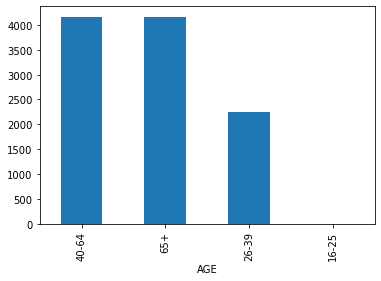

In [86]:
# Age group of drivers most involved in accidents
age_accident.plot(kind='bar')

<AxesSubplot:xlabel='AGE'>

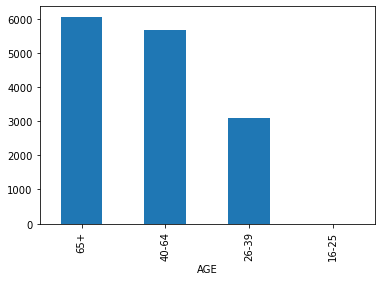

In [87]:
# Age group of drivers with the most speeding violations
age_speed.plot(kind='bar')

<AxesSubplot:xlabel='AGE'>

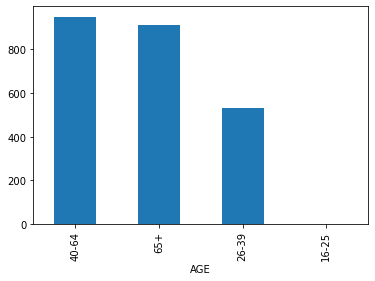

In [88]:
# Age group of drivers most caught driving under the influence
age_drunk.plot(kind='bar')

## The gender of drivers involved in car accidents


<AxesSubplot:ylabel='PAST_ACCIDENTS'>

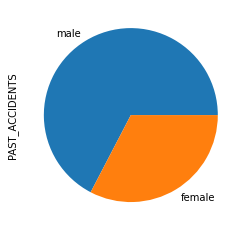

In [89]:
# Gender most involved in car accidents
gender_accident.plot(kind='pie')

## Driving experience

<AxesSubplot:ylabel='DRIVING_EXPERIENCE'>

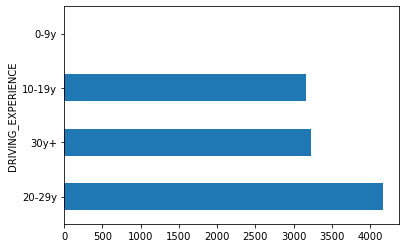

In [90]:
# Drivers of what experience of driving are most involved in road accidents
exp_accident.plot(kind='barh')

DRIVING_EXPERIENCE
20-29y    5794
30y+      4692
10-19y    4343
0-9y         0
Name: SPEEDING_VIOLATIONS, dtype: int64

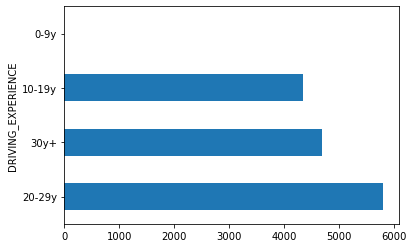

In [91]:
# Drivers of what experience get the most speeding tickets
exp_speed.plot(kind='barh')
exp_speed

## Type of vehicle that is the most involved in car accidents and over speeding

<AxesSubplot:xlabel='VEHICLE_TYPE'>

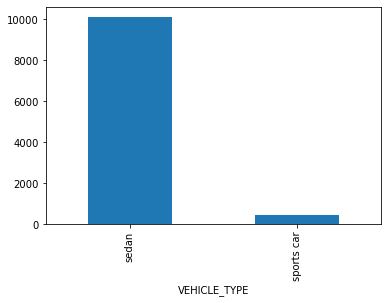

In [93]:
#Type of vehicle involved in most accidents
vehicle_accident.plot(kind='bar')

<AxesSubplot:xlabel='VEHICLE_TYPE'>

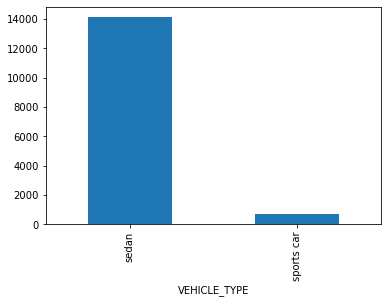

In [96]:
#Vehicles involved in the most issuing of speeding tickets
vehicle_speed.plot.bar()

## Educational background of drivers involved in accidents and over-speeding

<AxesSubplot:xlabel='EDUCATION'>

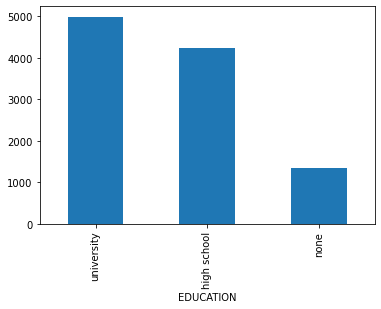

In [97]:
education_accident.plot(kind='bar')

<AxesSubplot:xlabel='EDUCATION'>

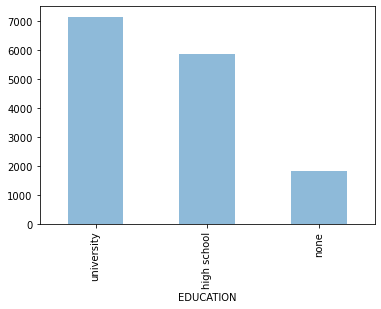

In [98]:
education_speed.plot.bar(alpha=0.5)

## Are most of the vehicles in accidents and speeding violations personally owned by the culprit?

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

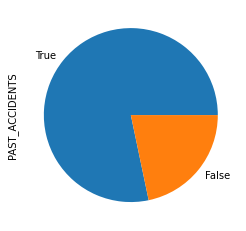

In [99]:
owner_accident.plot.pie()

<AxesSubplot:ylabel='SPEEDING_VIOLATIONS'>

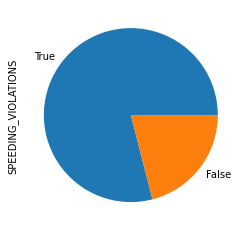

In [100]:
owner_speed.plot.pie()

## If most accidents occured before or after 2015

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

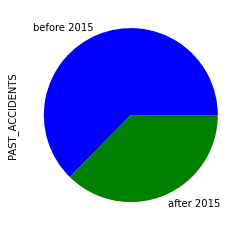

In [101]:
year_accident.plot.pie(colors=['b','g'])

## Financial class of kenyans per accidents caused, distance covered annually and their average credit score 

<AxesSubplot:xlabel='INCOME'>

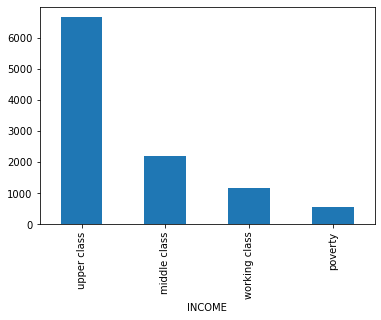

In [102]:
class_accident.plot.bar()

<AxesSubplot:xlabel='INCOME'>

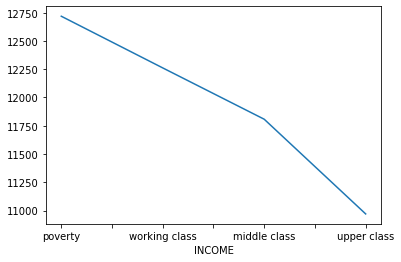

In [103]:
class_distance.plot.line()

<AxesSubplot:ylabel='INCOME'>

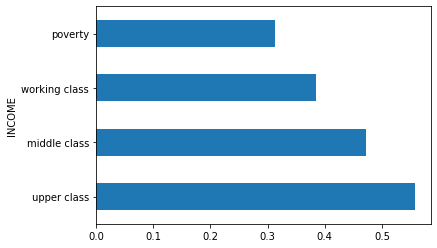

In [104]:
class_credit.plot.barh()

## Vehicles most driven by single drivers vs married drivers

<AxesSubplot:ylabel='VEHICLE_TYPE'>

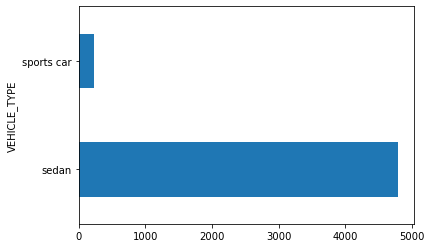

In [105]:
single_vehicle.plot.barh()


<AxesSubplot:ylabel='VEHICLE_TYPE'>

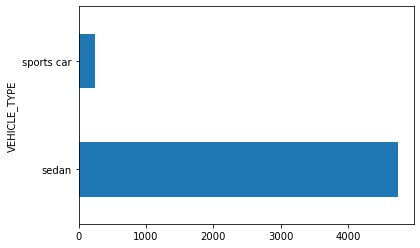

In [106]:
married_vehicle.plot.barh()

## Victims involved in the most accidents

<AxesSubplot:ylabel='NUMBER'>

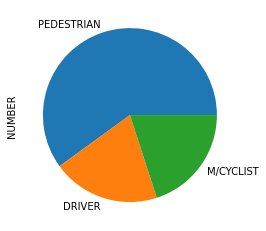

In [109]:
victim_accident.plot.pie()